## Name: Naveen Aradhyamath

## M.no: 9731047593

# Objective: Create a hybrid model for stock price/performance prediction using Monte Carlo Simulation: 

Asset pricing with monte carlo simulation:

I have used Brownian motion formula for the simulation:

price Today = price Yesterday * e^r

r is a log return of the share price between yesterday and today

r = log (today's price/yesterday's price)

since we know the price of yesterday, but we dont know the 'r'
to find r :

we can use brownian motion in order to model r:

### It has two components:

### 1.Drift:
the direction of rates of return have been headed in the past. ln(current price/previous price)

Drift = (mean - (0.5 * varience))

### 2.Volatility:

Random Variable = S.D(x) Z(Rand(0;1))

## final formula :

## Price Today = price yesterday * e^(Drift) + (Random Variabl)






Importing the required modules for analysis

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

Assigning the ticker name of SENSEX to capture the data from yahoo finance and also you can see that i'm collecting the data of adjusted closing price and their respective date from a decade.

In [ ]:
ticker = '^BSESN'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2010-1-1')['Adj Close']
data.head()

formula for log returns using numpy log method

In [35]:
log_returns = np.log(1 + data.pct_change())

In [36]:
type(log_returns)

pandas.core.frame.DataFrame

In [37]:
log_returns.tail()

,^BSESN
Date,
2021-04-28,0.016006
2021-04-29,0.000645
2021-04-30,-0.019962
2021-05-03,-0.001310
2021-05-04,-0.009591


Plot showing the performance of sensex from a past decade

<AxesSubplot:xlabel='Date'>

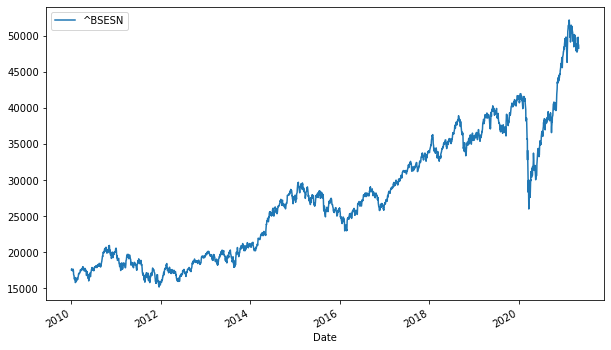

In [38]:
data.plot(figsize=(10,6))

plot shows that the returns are normally distributed and have a stable mean

<AxesSubplot:xlabel='Date'>

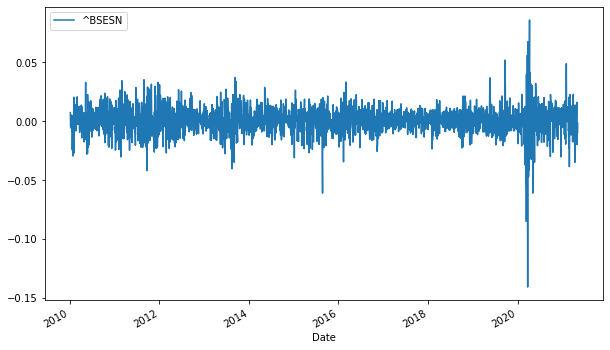

In [39]:
log_returns.plot(figsize = (10,6))

mean of the log returns :

In [40]:
u = log_returns.mean()
u

^BSESN    0.000364
dtype: float64

varience of the log returns to find out the drift comonent:

In [43]:
var = log_returns.var()
var

^BSESN    0.000124
dtype: float64

formula that i have mentioned initially:

drift = mean - 1/2 * varience

In [45]:
drift = u - (0.5 * var)
drift

^BSESN    0.000302
dtype: float64

w.k.t:

r = drift + stdev * e^r

I have found drift, so let me find stdev now.

In [46]:
stdev = log_returns.std()
stdev

^BSESN    0.01112
dtype: float64

In [47]:
type(drift)

pandas.core.series.Series

In [48]:
type(stdev)

pandas.core.series.Series

In [57]:
drft = np.array(drift)

In [58]:
sd = np.array(stdev)

Value 'Z' corresponds to the distance between the mean and the events, expressed as the numder of standard deviations.
by using norm.ppf i have found out the the probability of events occuring for 95% then the distance between this event and the mean will be approximately 1.65 stdev which is found below in the code line 

In [4]:
norm.ppf(0.95)

1.6448536269514722

To complete the second component i have used numpy random method to generate the matrix of 10X2 and assigned it to x variable

In [53]:
x = np.random.rand(10,2)
x

array([[0.64807666, 0.42366263],
       [0.29836097, 0.92157761],
       [0.87318579, 0.02478253],
       [0.07872721, 0.18715331],
       [0.27911628, 0.34879908],
       [0.72398852, 0.52905152],
       [0.76518891, 0.90616641],
       [0.13974488, 0.14506507],
       [0.57564406, 0.32718122],
       [0.31375393, 0.38116342]])

I have included these randomly generated numbers into .ppf method of norm to find out the distance from the mean and the randomly generated events.
1st row of .ppf(x) output corresponding to the random number of x variable gives the probability of that number.

In [54]:
norm.ppf(x)

array([[ 0.38013302, -0.19253232],
       [-0.52912038,  1.41576345],
       [ 1.14158055, -1.96369856],
       [-1.41368496, -0.88843536],
       [-0.58546877, -0.38856474],
       [ 0.59473149,  0.07288585],
       [ 0.72309392,  1.31751164],
       [-1.08146628, -1.05783615],
       [ 0.19076224, -0.44771008],
       [-0.48523754, -0.30242664]])

computing the Z value for the second component of the formula

In [55]:
z = norm.ppf(np.random.rand(10,2))
z

array([[ 1.12514664, -1.22525654],
       [-0.33242544,  0.91117006],
       [ 0.79646623,  0.34811067],
       [ 0.54793306,  0.01737068],
       [ 1.8559586 , -0.07920003],
       [-1.46479958, -0.60005228],
       [ 1.21039333,  1.46484795],
       [ 0.78268756, -0.9216265 ],
       [-0.37422195, -0.25560471],
       [ 0.51655555, -0.13143437]])

i'm considering time intervals to be 1000 days and that of 10 iterations.

In [ ]:
t_intervals = 1000
iterations = 10

to find out -

Daily returns = e^r

r = drift + stdev.z

I have used the numpy.exp method as a eulers number 

e^ (expression) which is calculated below

In [68]:
daily_returns = np.exp(drft + sd * norm.ppf(np.random.rand(t_intervals, iterations)))

output showing the daily returns 

In [83]:
daily_returns

array([[1.01113805, 0.99173806, 0.98863807, ..., 0.98991394, 0.99756233,
        0.9993083 ],
       [1.01256547, 1.01424472, 0.9881571 , ..., 1.00144143, 0.98975713,
        1.00277109],
       [0.99034287, 0.99729907, 1.00759199, ..., 0.99468253, 0.98443948,
        1.01227413],
       ...,
       [1.01259462, 0.98674462, 0.99904939, ..., 0.99137867, 1.00832947,
        0.99190578],
       [0.98512312, 0.99271829, 0.99220992, ..., 0.97901682, 1.00170503,
        0.99056263],
       [1.02395048, 0.99192471, 0.99751652, ..., 0.99948728, 1.01334309,
        0.99999788]])

S(t) = S(0) .daily_return(t) // to obtain a price list by multiplying the previous price of the stock to the simulated daily_return

S(t+1) = S(t).daily_retuns(t+1)
...............
..........
...

S(t+999) = S(t+999).daily_returns(t+999)

above shows the formula to find the price in day t and we can find the expected price of the future.

since to get the first price that is current market price. the below code indicates

In [62]:
S0 = data.iloc[-1]
S0

^BSESN    48253.511719
Name: 2021-05-04 00:00:00, dtype: float64

I have used the zeros_like() method to obtain the dimensions of daily price and replace it with the expected future price

In [63]:
price_list = np.zeros_like(daily_returns)
print(price_list)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Setting up the initial value

In [65]:
price_list[0] = S0
print(price_list)

[[48253.51171875 48253.51171875 48253.51171875 ... 48253.51171875
  48253.51171875 48253.51171875]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 ...
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]
 [    0.             0.             0.         ...     0.
      0.             0.        ]]


Using for loop for filling up the each index value.

In [70]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

price list showing the predicted values for 1000 days and for 10 series of different values.

In [72]:
price_list

array([[ 48253.51171875,  48253.51171875,  48253.51171875, ...,
         48253.51171875,  48253.51171875,  48253.51171875],
       [ 48859.8398448 ,  48940.86938671,  47682.05011871, ...,
         48323.06586717,  47759.25737332,  48387.22656623],
       [ 48387.99378987,  48808.68342018,  48044.05167412, ...,
         48066.10960803,  47016.09827642,  48981.13761409],
       ...,
       [ 75769.89682769,  61427.285925  ,  40095.92953372, ...,
         80026.63863468,  36655.40377661, 194273.61554023],
       [ 74642.67688164,  60979.99009627,  39783.57888269, ...,
         78347.42516894,  36717.90243019, 192440.18396844],
       [ 76430.40489308,  60487.55929377,  39684.77718116, ...,
         78307.25494544,  37207.83279612, 192439.77694344]])

Plot showing the performance of SENSEX for coming 1000 days with the series of 10 different values 

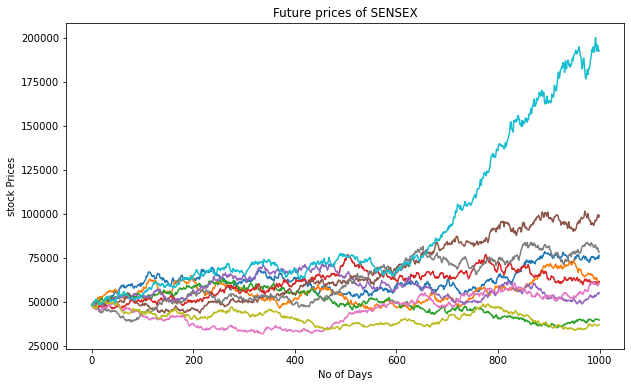

In [80]:
plt.figure(figsize = (10,6))
plt.plot(price_list)
plt.ylabel('stock Prices')
plt.xlabel('No of Days')
plt.title('Future prices of SENSEX')
plt.savefig('myBSEplot.png')
plt.show()
print()

## Conclusion: We can see that the above plot shows the different series of outcomes and the sensex value performance for 1000 days and hence we can conclude this model to be useful for the future prediction of values. 